# Importation des données et des bibliothèques

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

def make_confusion_matrix(test,
                          pred,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

    Arguments
    ---------
    cf:            confusion matrix to be passed in

    group_names:   List of strings that represent the labels row by row to be shown in each square.

    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

    count:         If True, show the raw number in the confusion matrix. Default is True.

    normalize:     If True, show the proportions for each category. Default is True.

    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

    xyticks:       If True, show x and y ticks. Default is True.

    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

    sum_stats:     If True, display summary statistics below the figure. Default is True.

    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html

    title:         Title for the heatmap. Default is None.

    '''
    cf = confusion_matrix(test, pred)
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Vrai label')
        plt.xlabel('Label prédit' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

In [2]:
data = pd.read_csv("bird.csv")
data

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW
...,...,...,...,...,...,...,...,...,...,...,...,...
415,415,17.96,1.63,19.25,1.33,18.36,1.54,31.25,1.33,21.99,1.15,SO
416,416,19.21,1.64,20.76,1.49,19.24,1.45,33.21,1.28,23.60,1.15,SO
417,417,18.79,1.63,19.83,1.53,20.96,1.43,34.45,1.41,22.86,1.21,SO
418,418,20.38,1.78,22.53,1.50,21.35,1.48,36.09,1.53,25.98,1.24,SO


## Analyse des données

In [3]:
print(f"Le nombre d'attributs dans la dataframe est : {data.shape[1]}")
print(f"Le nombre d'observations dans la dataframe est : {data.shape[0]}")

Le nombre d'attributs dans la dataframe est : 12
Le nombre d'observations dans la dataframe est : 420


In [4]:
print("Les statistiques du dataframe avant le pré traitement sont :\n")
data.drop(columns="id").describe()

Les statistiques du dataframe avant le pré traitement sont :



,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
count,419.000000,419.000000,417.000000,418.000000,418.000000,419.000000,418.000000,419.000000,419.000000,419.000000
mean,64.650501,4.370573,69.115372,3.597249,36.872416,3.220883,64.662823,3.182339,39.229976,2.930024
std,53.834549,2.854617,58.784775,2.186747,19.979082,2.023581,37.838145,2.080827,23.184313,2.185673
min,9.850000,1.140000,14.090000,1.000000,11.830000,0.930000,5.500000,0.870000,7.770000,0.660000
25%,25.170000,2.190000,28.050000,1.870000,21.297500,1.715000,36.417500,1.565000,23.035000,1.425000
50%,44.180000,3.500000,43.710000,2.945000,31.130000,2.520000,52.120000,2.490000,31.740000,2.230000
75%,90.310000,5.810000,97.520000,4.770000,47.120000,4.135000,82.870000,4.255000,50.250000,3.500000
max,420.000000,17.840000,422.000000,12.000000,117.070000,11.640000,240.000000,11.030000,175.000000,14.090000


In [5]:
data.value_counts().sum()

413

In [6]:
print("Les types de données dans le dataframe sont :\n")
data.dtypes.value_counts()

Les types de données dans le dataframe sont :



float64    10
int64       1
object      1
Name: count, dtype: int64

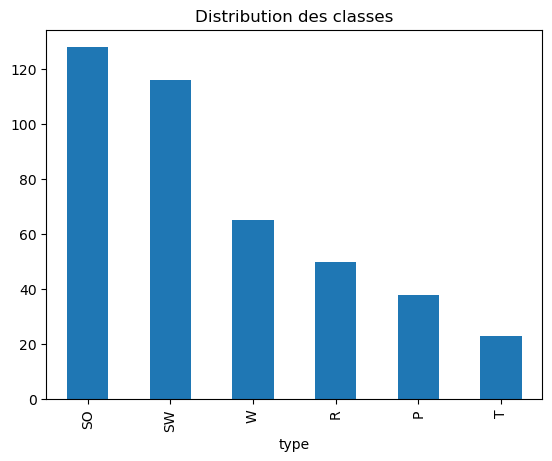

In [7]:
counts_by_class = data["type"].value_counts()
counts_by_class.plot.bar(title="Distribution des classes")
plt.savefig("class_distrib.png")
plt.show()

On remarque que les classes sont déséquilibrées. En effet, les classes `SO` et `SW` sont les plus représentées à 30% du dataset chacune. Le reste des classes représente chacunes autour de 10% du dataset. À première vu, ce déséquilibre ne semble pas énorme mais si on observe par exemple un sur-apprentissage lors de l'entraînement de nos modèles de prédiction plus tard, on pourra effectuer un sous-échantillonage des classes majoritaires afin de palier à ce problème.

In [8]:
print(f"Le nombre de lignes dupliquées dans le dataframe est : {data.duplicated().sum()}")
print(f"Le nombre de lignes dupliquées dans le dataframe sans la colonne id est : {data.drop('id',axis=1).duplicated().sum()}")

Le nombre de lignes dupliquées dans le dataframe est : 0
Le nombre de lignes dupliquées dans le dataframe sans la colonne id est : 0


Nous avons comparé les lignes dupliquées avec et sans la colonne id qui pourrait inclure un biais sur l'unicité des lignes et nous avons trouvé que les deux valeurs sont les mêmes, donc nous pouvons conclure que le dataframe n'a pas de lignes dupliquées.

In [9]:
print(f"Il y a {data.isna().sum().sum()} valeurs manquantes dans notre dataset")

Il y a 15 valeurs manquantes dans notre dataset


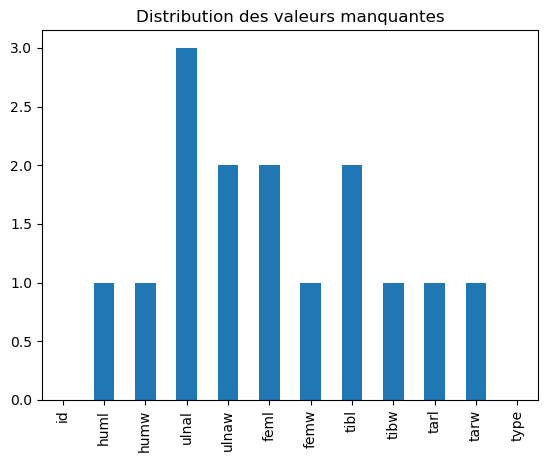

In [10]:
data.isna().sum().plot.bar(title="Distribution des valeurs manquantes")
plt.savefig("missing_distrib.png")

La plupart des valeurs manquantes proviennent des attributs `ulnal`, `ulnaw`, `feml` et `tibl`. Elles ne sont pas manquantes par hasard. En effet, les espèces concernées ne possèdent tout siplement pas ces os. Il sera néanmois nécéssaire de remplir ces valeurs lors du prétraitement des données afin de pouvoir exploiter les données des oiseaux concernés.

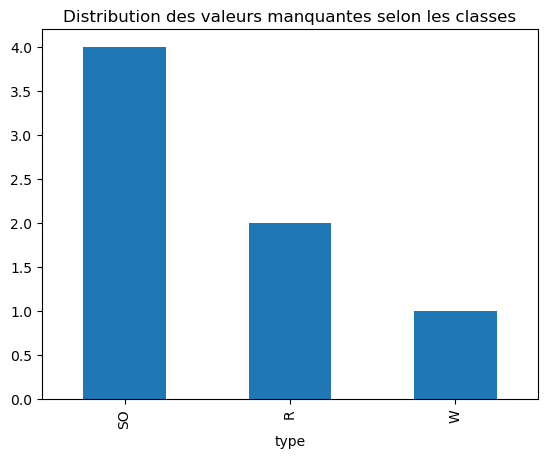

In [11]:
data[data.isna().any(axis=1)]["type"].value_counts().plot.bar(title="Distribution des valeurs manquantes selon les classes")
plt.savefig("missing_distrib_classes.png")

## Prétraitement des données 

### Traitement des cellules manquantes

La colonne id est unique pour chaque observation et n'a aucun impact sur le label donc on peut la supprimer afin de ne pas fausser les résultats de l'analyse.

In [12]:
data.drop("id", axis=1, inplace=True)

On peut remplir les valeurs manquantes des attributs numériques par la valeur la plus proche de chaque attribut au lieu de supprimer les observations qui les contiennent car on ne veut pas perdre des informations importantes.

In [13]:
numeric_columns = data.select_dtypes(exclude = "object").columns
data.loc[:, data.columns != 'type'] = data.loc[:, data.columns != 'type'].interpolate(method='nearest')
print(f"Il y a maintenant {data.isna().sum().sum()} valeurs manquantes dans notre dataset")

Il y a maintenant 0 valeurs manquantes dans notre dataset


### Normalisation

On a ensuite normalisé nos données. Cela est important dans de nombreux algorithmes d'apprentissage automatique car cela peut aider à améliorer les performances et la convergence de l'algorithme. En effet, les valeurs aberrantes peuvent avoir un impact disproportionné sur certains algorithmes si elles ne sont pas mises à l'échelle. La mise à l'échelle peut aider à atténuer cet effet. Aussi, certains algorithmes d'apprentissage automatique, en particulier ceux basés sur des méthodes de gradient, convergent plus rapidement lorsque les caractéristiques sont mises à l'échelle.

In [14]:
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])
data.describe()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
count,4.200000e+02,4.200000e+02,4.200000e+02,4.200000e+02,4.200000e+02,4.200000e+02,4.200000e+02,4.200000e+02,4.200000e+02,420.000000
mean,-6.767074e-17,6.767074e-17,-2.030122e-16,-1.353415e-16,1.522592e-16,-1.015061e-16,-2.368476e-16,6.767074e-17,-2.537653e-16,0.000000
std,1.001193e+00,1.001193e+00,1.001193e+00,1.001193e+00,1.001193e+00,1.001193e+00,1.001193e+00,1.001193e+00,1.001193e+00,1.001193
min,-1.018290e+00,-1.132173e+00,-9.338585e-01,-1.189537e+00,-1.255969e+00,-1.135810e+00,-1.560479e+00,-1.109629e+00,-1.361021e+00,-1.041865
25%,-7.325293e-01,-7.636704e-01,-6.957151e-01,-7.904289e-01,-7.827847e-01,-7.459543e-01,-7.459729e-01,-7.777261e-01,-7.013549e-01,-0.689951
50%,-3.813532e-01,-3.056737e-01,-4.359883e-01,-2.972778e-01,-2.885474e-01,-3.461970e-01,-3.317749e-01,-3.303793e-01,-3.226596e-01,-0.319697
75%,4.774186e-01,5.050330e-01,4.842527e-01,5.399322e-01,5.182224e-01,4.694069e-01,4.865673e-01,5.174151e-01,4.829995e-01,0.270646
max,6.614719e+00,4.728780e+00,6.025917e+00,3.856660e+00,4.019237e+00,4.166234e+00,4.643894e+00,3.777515e+00,5.862159e+00,5.116049


On transforme ensuite l'attribut catégoriel `type` en attribut numérique en utilisant la méthode LabelEncoder.

In [15]:
encoder = LabelEncoder()
encoder.fit(data["type"])
mapping = dict(zip(range(len(encoder.classes_)), encoder.classes_))
data["type"] = encoder.fit_transform(data["type"])
print(f"La correspondance entre les valeurs numériques et les valeurs catégorielles de l'attribut Type est : {mapping}")

La correspondance entre les valeurs numériques et les valeurs catégorielles de l'attribut Type est : {0: 'P', 1: 'R', 2: 'SO', 3: 'SW', 4: 'T', 5: 'W'}


## Exploitation des données

## Analyse de la corrélation

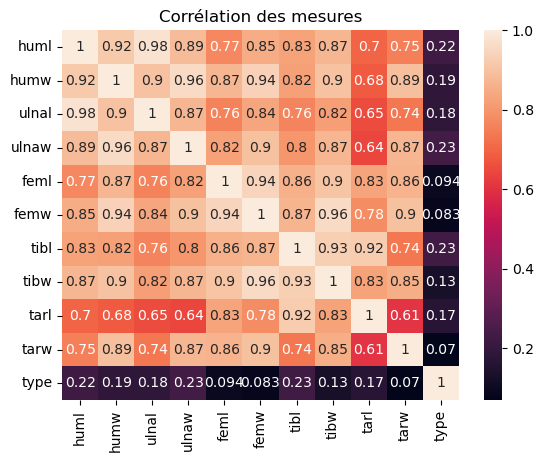

In [16]:
correlation = data.corr()
sns.heatmap(correlation, annot=True)
plt.title("Corrélation des mesures")
plt.savefig("correlation.png")
plt.show()

On observe une corrélation très importante entre les caractéristiques, presque à 1 pour certains attributs, qui est la valeur maximale.

Les attributs jumeauxs, c'est-à-dire `longueur` et `largeur` des os, ont pour la plupart une forte corrélation ce qui est intuitivement logique puisqu'il est rare qu'un os soit cubique, en général, plus il est long, plus il est fin.
Cependant, il existe tout de même des attributs jumeaux moins corrélés que les autres comme `tarl` et `tarw` qui ont une corrélation de `0.61`, ce qui est relativement faible comparés aux autres attributs.

On trouve aussi des corrélations surprenantes d'os non jumeaux comme `tibl` et `tarl`. Ces deux mesures correspondent à la longeur des os `Tibiotarse` et `Tarsométatarse` qui sont tous les deux connectés, ce qui pourrait expliquer cette corrélation.

Non seulement `tarl` est le plus corrélé avec `tibl`, mais il est aussi le moins corrélé avec sa mesure jumelle `tarw`, contrairement aux autres attributs !

Enfin, on observe que `feml`, `femw` et `tarw` n'ont pratiquement pas d'influence sur le type d'oiseau avec une corrélation de moins de `0.1`.

## Analyse des composantes principales

On utilise la méthode ACP pour réduire la dimensionnalité des données.

In [17]:
pca = PCA(n_components=10)
pca.fit(data[numeric_columns])

PCA(n_components=10)

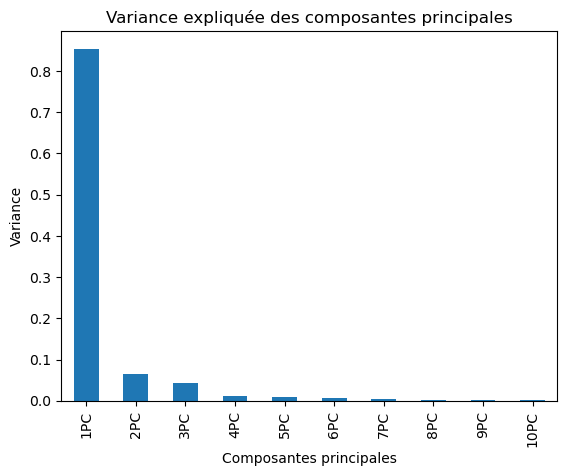

In [18]:
pca_ratio = pd.Series(pca.explained_variance_ratio_)

mylabels = [str(j+1)+"PC" for j in range(10)]
pca_ratio.plot(kind = 'bar')
plt.xticks(np.arange(10), mylabels)
plt.title("Variance expliquée des composantes principales")
plt.ylabel("Variance")
plt.xlabel("Composantes principales")
plt.savefig("PCA.png")
plt.show()

On remarque que les trois premières composantes principales expliquent la grande majorité de la variance des données.

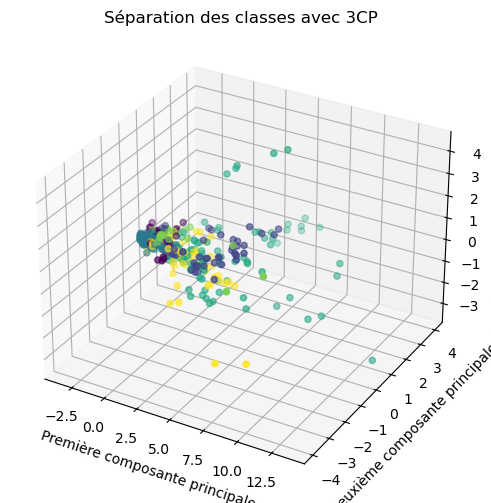

In [19]:
X_PCA = pca.transform(data[numeric_columns])

labels = data["type"].tolist()
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_PCA[:, 0], X_PCA[:, 1], X_PCA[:, 2], c=labels, cmap='viridis')
ax.set_xlabel('Première composante principale')
ax.set_ylabel('Deuxième composante principale')
ax.set_zlabel('Troisième composante principale')
plt.title('Séparation des classes avec 3CP')
plt.savefig("3CP.png")
plt.show()

## Classification des données

### Données

On prépare nos données d'entraînement et de test en utilisant la méthode `train_test_split` avec un ratio de 66% pour les données d'entraînement et 33% pour les données de test.
Afin de comparer ACP avec les données pures, ont prépare deux sets d'entraînement.

In [51]:
X = data[numeric_columns]
y = data["type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA[:,0:5], y, test_size=0.33, random_state=42, stratify=y)

### KNN-Voisins

#### Paramètres naïfs

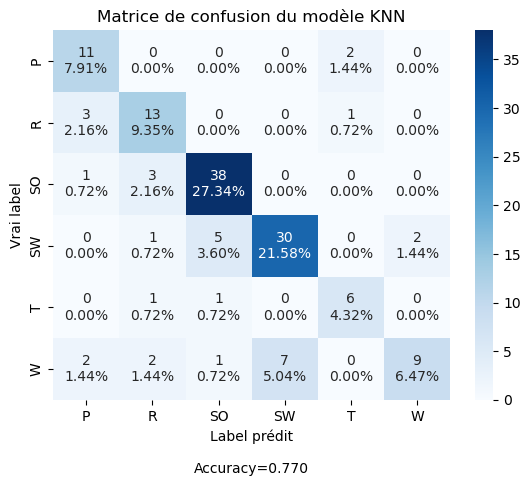

In [53]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
make_confusion_matrix(y_test, knn.predict(X_test), categories=mapping.values(), title="Matrice de confusion du modèle KNN")

On obtient déjà une précision plutôt satisfaisante de `75%`

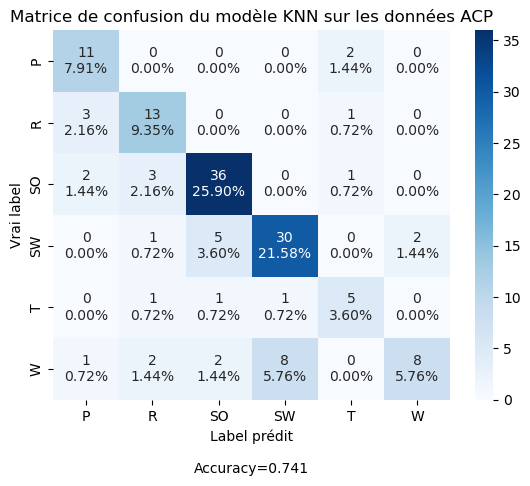

In [54]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_PCA, y_train_PCA)
make_confusion_matrix(y_test_PCA, knn.predict(X_test_PCA), categories=mapping.values(), title="Matrice de confusion du modèle KNN sur les données ACP")

L'utilisation des composantes principales nous fait perdre environ `3%` de précision.

#### Paramètres optimisés avec GridSearch

In [55]:
parameters = {
    'n_neighbors':np.arange(1,11),
    'metric': ["minkowski", "euclidean", "cityblock"]
}
knn = KNeighborsClassifier()
knn_gs = GridSearchCV(knn, parameters, scoring="accuracy", error_score='raise')

Meilleurs paramètres : {'metric': 'minkowski', 'n_neighbors': 1}


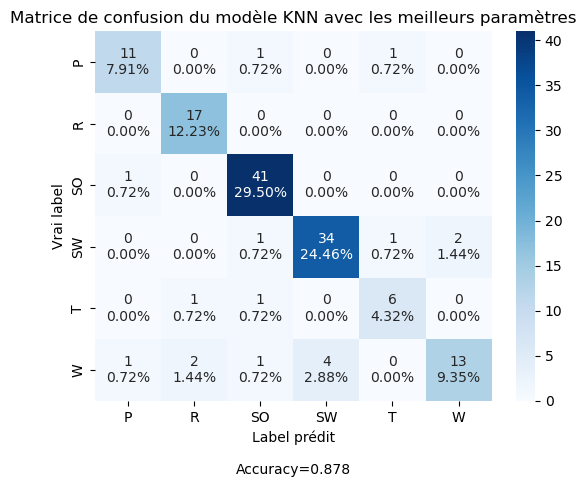

In [56]:
knn_gs.fit(X_train, y_train)

print(f"Meilleurs paramètres : {knn_gs.best_params_}")

make_confusion_matrix(y_test, knn_gs.predict(X_test), categories=mapping.values(), title="Matrice de confusion du modèle KNN avec les meilleurs paramètres")

Meilleurs paramètres : {'metric': 'cityblock', 'n_neighbors': 1}


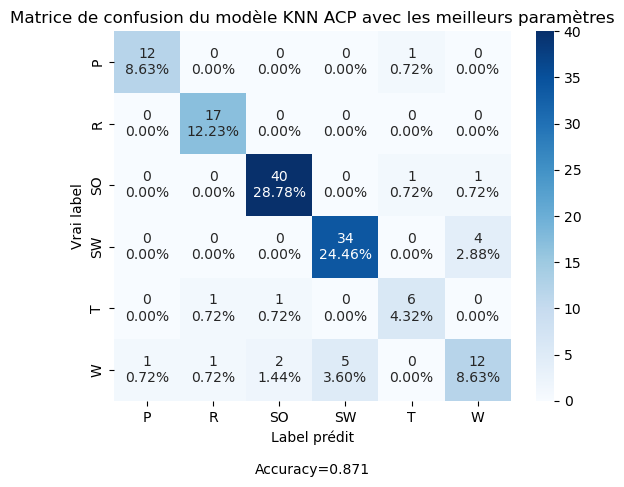

In [57]:
knn_gs.fit(X_train_PCA, y_train_PCA)

s, p = knn_gs.score(X_test_PCA, y_test_PCA), knn_gs.best_params_
print(f"Meilleurs paramètres : {knn_gs.best_params_}")

make_confusion_matrix(y_test_PCA, knn_gs.predict(X_test_PCA), categories=mapping.values(), title="Matrice de confusion du modèle KNN ACP avec les meilleurs paramètres")

En optimisant les hyper-paramètre, on augmente notre précision de moins de `1%`. Les hyper-paramètres le plus optimaux sont la distance minowski en métrique pour le modèle avec données brute et la distance city-block pour le modèle avec 4CP ainsi que la comparaison à `1` seul voisin pour les deux.

### Régression logistique

#### Paramètres naïfs

In [58]:
lr = LogisticRegression(random_state=42, C=5, max_iter=1000, solver='liblinear')

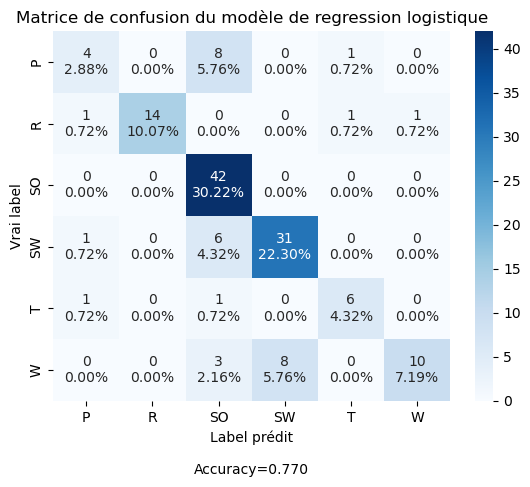

In [59]:
lr.fit(X_train, y_train)

make_confusion_matrix(y_test, lr.predict(X_test), categories=mapping.values(), title="Matrice de confusion du modèle de regression logistique")

Le modèle de régression logistique naïf a une précision presque `10%` plus importante que le modèle naïf précédent.

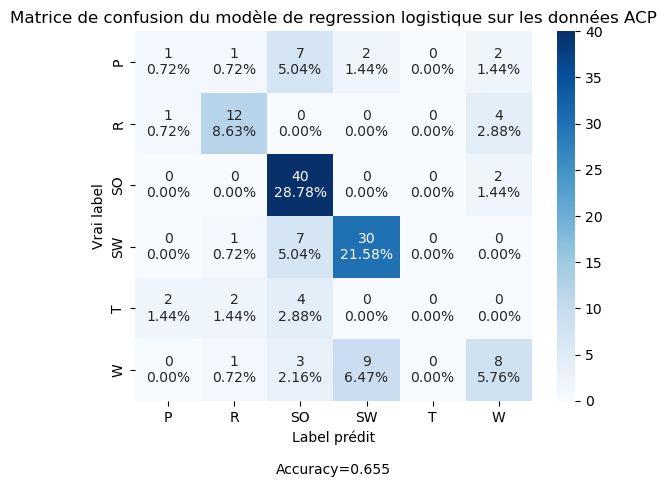

In [60]:
lr.fit(X_train_PCA, y_train_PCA)
make_confusion_matrix(y_test_PCA, lr.predict(X_test_PCA), categories=mapping.values(), title="Matrice de confusion du modèle de regression logistique sur les données ACP")

Néanmoins, l'utilisation des composantes principales nous fait perdre plus de précision que précédemment, ici presque `10%`.

#### Paramètres optimisés avec GridSearch

In [61]:
parameters = {
    'penalty':['l1', 'l2'], 
    'C': np.logspace(-3, 1, 20)
}
lr_gs = GridSearchCV(lr, parameters, scoring="accuracy", error_score='raise')

Meilleurs paramètres : {'C': 10.0, 'penalty': 'l1'}


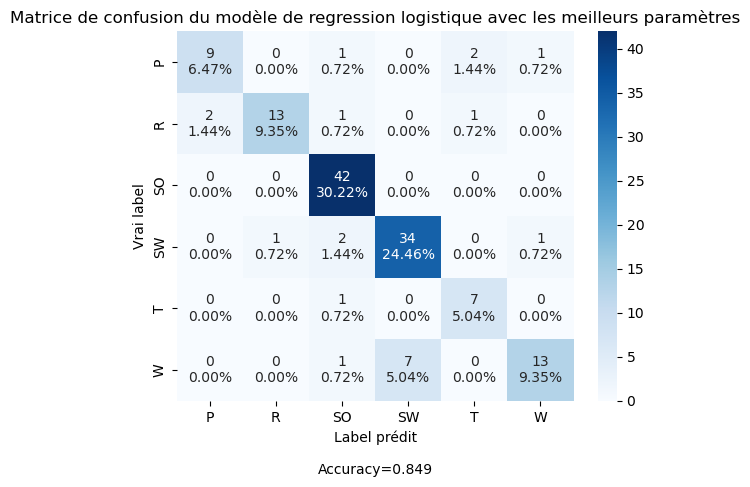

In [64]:
lr_gs.fit(X_train, y_train)

print(f"Meilleurs paramètres : {lr_gs.best_params_}")

make_confusion_matrix(y_test, lr_gs.predict(X_test), categories=mapping.values(), title="Matrice de confusion du modèle de regression logistique avec les meilleurs paramètres")

Meilleurs paramètres : {'C': 6.158482110660261, 'penalty': 'l1'}


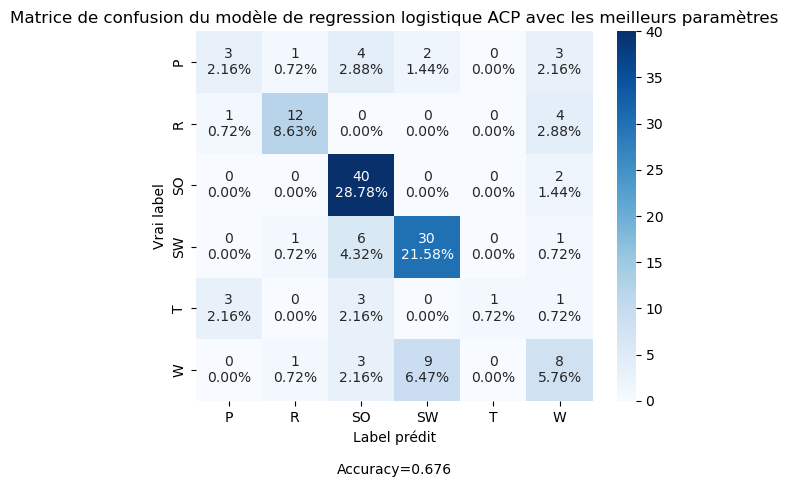

In [63]:
lr_gs.fit(X_train_PCA, y_train_PCA)

print(f"Meilleurs paramètres : {lr_gs.best_params_}")

make_confusion_matrix(y_test_PCA, lr_gs.predict(X_test_PCA), categories=mapping.values(), title="Matrice de confusion du modèle de regression logistique ACP avec les meilleurs paramètres")

Avec des paramètres optimisés, le modèle de régression logistique a une précision d'environ `67%` sans les composantes principales et de `56%` avec. Le modèle des N-voisins est donc finalement plus optimal.

### Centroïdes

#### Paramètres naïfs

In [65]:
ct = NearestCentroid()

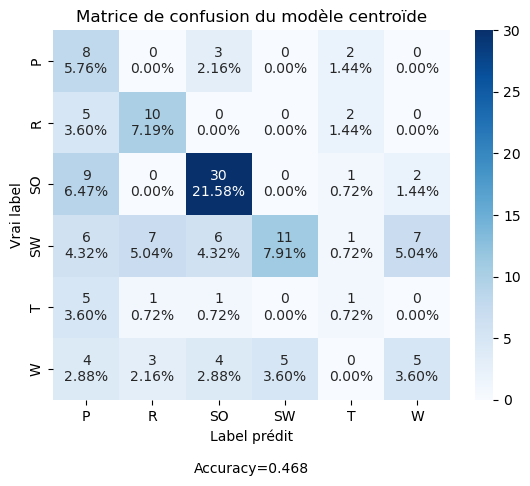

In [66]:
ct.fit(X_train, y_train)
make_confusion_matrix(y_test, ct.predict(X_test), categories=mapping.values(), title="Matrice de confusion du modèle centroïde")

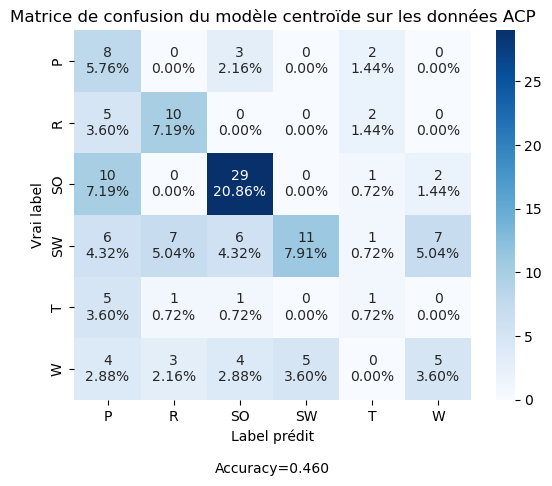

In [67]:
ct.fit(X_train_PCA, y_train_PCA)
make_confusion_matrix(y_test_PCA, ct.predict(X_test_PCA), categories=mapping.values(), title="Matrice de confusion du modèle centroïde sur les données ACP")

#### Paramètres optimisés avec GridSearch

In [68]:
parameters = {
    'metric': ["euclidean", "manhattan"]
}
ct_gs = GridSearchCV(ct, parameters, scoring="accuracy", error_score='raise', refit=True)

Meilleurs paramètres : {'metric': 'manhattan'}


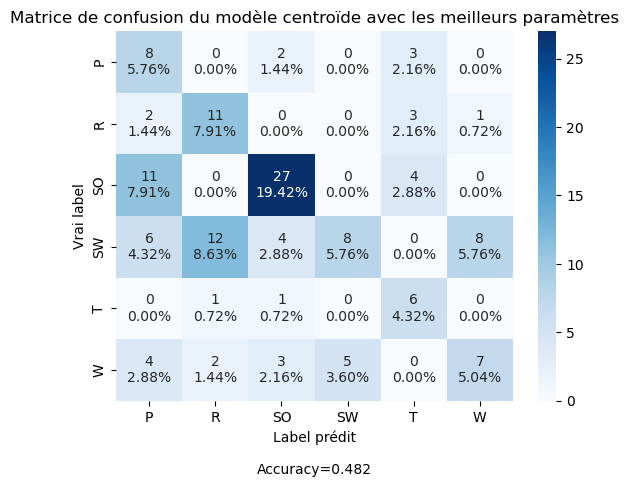

In [69]:
ct_gs.fit(X_train, y_train)

print(f"Meilleurs paramètres : {ct_gs.best_params_}")
make_confusion_matrix(y_test, ct_gs.predict(X_test), categories=mapping.values(), title="Matrice de confusion du modèle centroïde avec les meilleurs paramètres")

Meilleurs paramètres : {'metric': 'manhattan'}


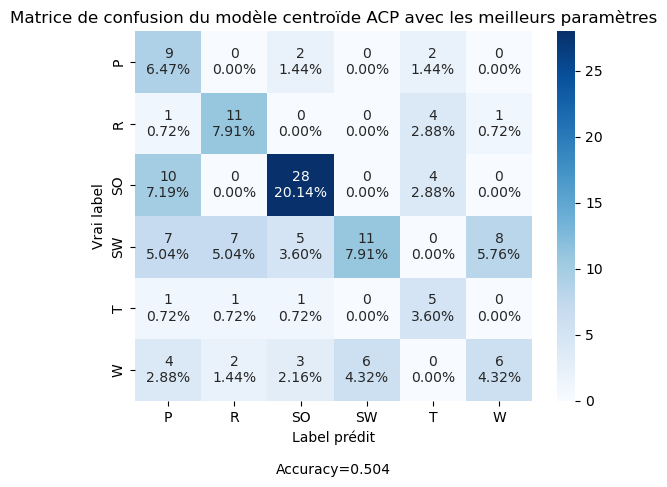

In [70]:
ct_gs.fit(X_train_PCA, y_train_PCA)

print(f"Meilleurs paramètres : {ct_gs.best_params_}")
make_confusion_matrix(y_test_PCA, ct_gs.predict(X_test_PCA), categories=mapping.values(), title="Matrice de confusion du modèle centroïde ACP avec les meilleurs paramètres")

Ce modèle a une précision d'environ `50%`. Pour une classification binaire, cela signifie qu'il prédit au hasard et donc ne fonctionne pas.

### Réseau de neurones

#### Paramètres naïfs

In [71]:
clf = MLPClassifier(max_iter=10000, random_state=1)

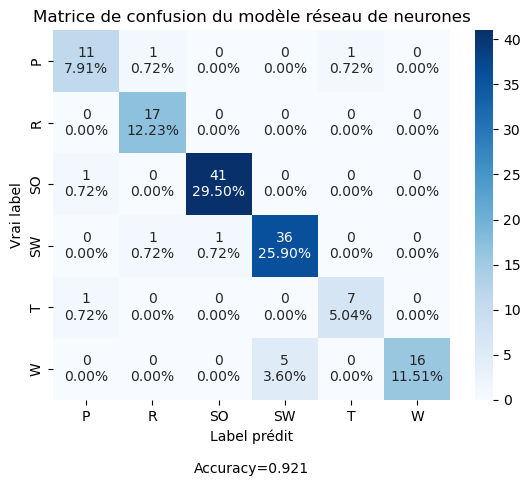

In [79]:
clf.fit(X_train, y_train)
make_confusion_matrix(y_test, clf.predict(X_test), categories=mapping.values(), title="Matrice de confusion du modèle réseau de neurones")

Le modèle réseau de neurones, sans optimisation, a tout de suite une précision de `88%` équivalente au modèle N-voisin.

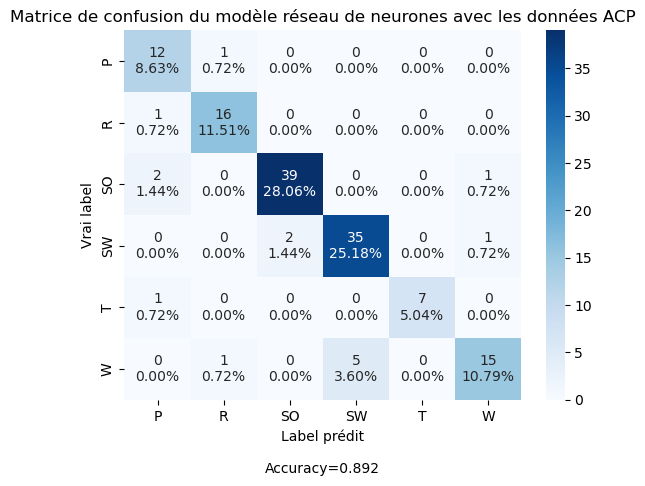

In [73]:
clf.fit(X_train_PCA, y_train_PCA)
make_confusion_matrix(y_test_PCA, clf.predict(X_test_PCA), categories=mapping.values(), title="Matrice de confusion du modèle réseau de neurones avec les données ACP")

Avec les composantes principales, la précision diminue encore de `10%`.

#### Paramètres optimisés avec GridSearch

In [74]:
parameters = {
    'solver': ['lbfgs', 'sgd', 'adam']
}
clf_gs = GridSearchCV(clf, parameters, scoring="accuracy", error_score='raise', refit=True)

Meilleurs paramètres : {'solver': 'adam'}


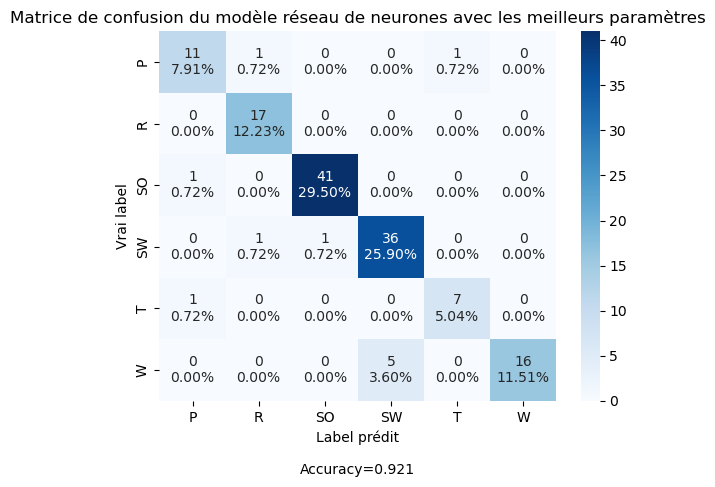

In [81]:
clf_gs.fit(X_train, y_train)

print(f"Meilleurs paramètres : {clf_gs.best_params_}")

make_confusion_matrix(y_test, clf_gs.predict(X_test), categories=mapping.values(), title="Matrice de confusion du modèle réseau de neurones avec les meilleurs paramètres")
plt.savefig("best_model_confusion.png")

Meilleurs paramètres : {'solver': 'adam'}


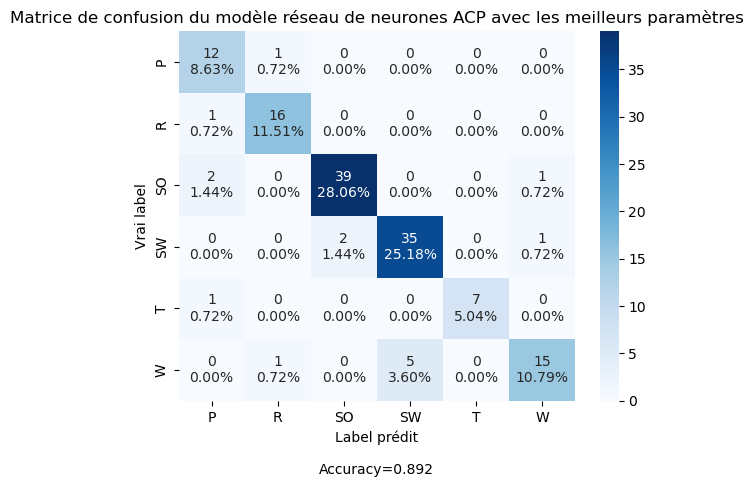

In [80]:
clf_gs.fit(X_train_PCA, y_train_PCA)

print(f"Meilleurs paramètres : {clf_gs.best_params_}")

make_confusion_matrix(y_test_PCA, clf_gs.predict(X_test_PCA), categories=mapping.values(), title="Matrice de confusion du modèle réseau de neurones ACP avec les meilleurs paramètres")
plt.savefig("best_model_confusion_PCA.png")

Le modèle réseau de neurones avec des hyper-paramètres optimisés est équivalent au modèle naïf.

### Random Forest

#### Paramètres naïfs

In [24]:
rf = RandomForestClassifier(random_state=1)

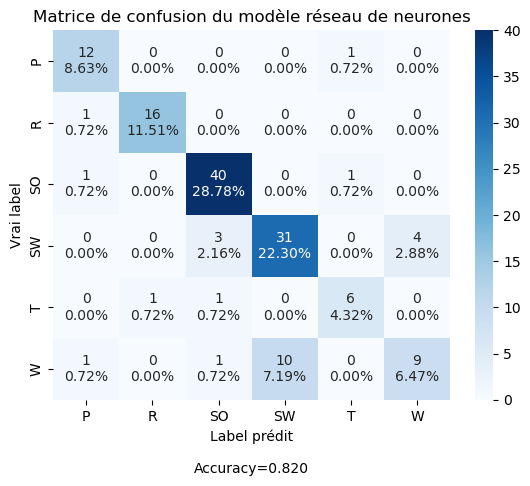

In [25]:
rf.fit(X_train, y_train)
make_confusion_matrix(y_test, rf.predict(X_test), categories=mapping.values(), title="Matrice de confusion du modèle Random Forest")

Les performances de ce modèle sont comparable avec celles du modèle précédent. De plus, nous avons remarqué que le temps d'entraînement est bien plus rapide. 

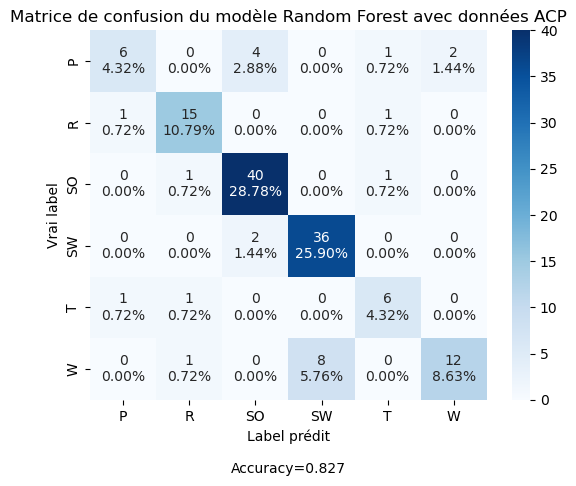

In [46]:
rf.fit(X_train_PCA, y_train_PCA)
make_confusion_matrix(y_test_PCA, rf.predict(X_test_PCA), categories=mapping.values(), title="Matrice de confusion du modèle Random Forest avec données ACP")

Avec les données ACP, le modèle Random Forest a une précision meilleure qu'avec les données brutes !

#### Paramètres optimisés avec GridSearch

In [44]:
parameters = {
    'bootstrap': [True, False],
    'max_depth': [10, 50, 100, None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
}
rf_gs = GridSearchCV(rf, parameters, scoring="accuracy", error_score='raise', refit=True, n_jobs=-1)

Meilleurs paramètres : {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


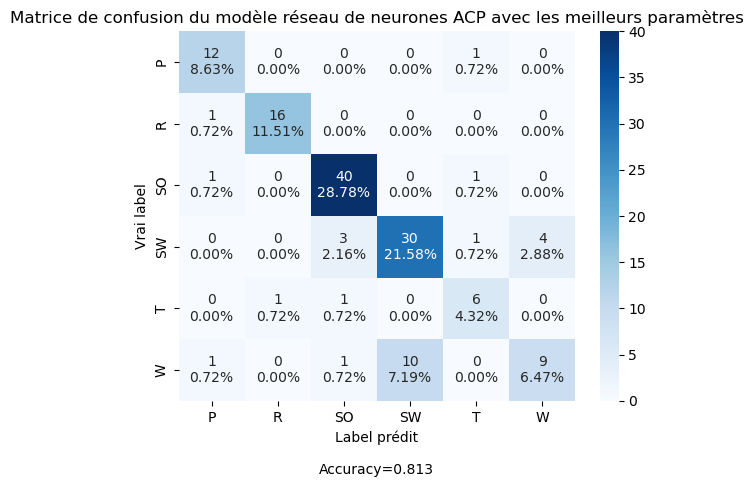

In [45]:
rf_gs.fit(X_train, y_train)

print(f"Meilleurs paramètres : {rf_gs.best_params_}")

make_confusion_matrix(y_test, rf_gs.predict(X_test), categories=mapping.values(), title="Matrice de confusion du modèle Random Forest avec les meilleurs paramètres")

Meilleurs paramètres : {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


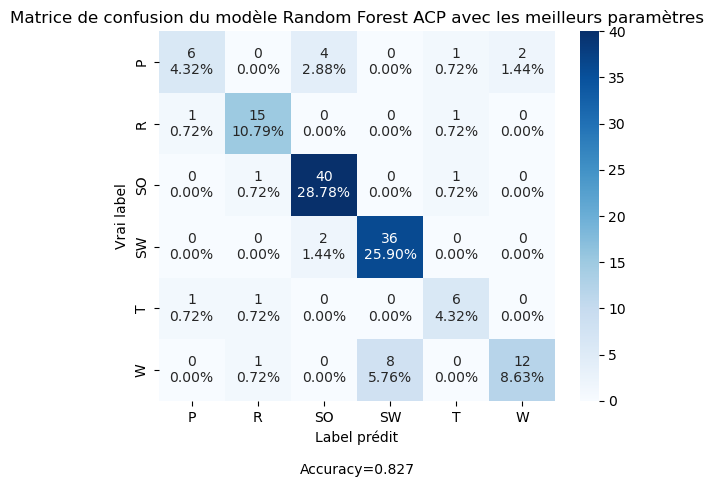

In [47]:
rf_gs.fit(X_train_PCA, y_train_PCA)

print(f"Meilleurs paramètres : {rf_gs.best_params_}")

make_confusion_matrix(y_test_PCA, rf_gs.predict(X_test_PCA), categories=mapping.values(), title="Matrice de confusion du modèle Random Forest ACP avec les meilleurs paramètres")

Les performances du modèle Random Forest avec les composantes ACP sont les mêmes avec hyper-paramètres optimisés. 

La meilleure précision obtenue est celles du modèle réseau de neurones sans ACP, elle est de `92%`. La meilleure précision avec 4CP obtenue est de `89%`. 